In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
titanic=pd.read_csv(r"C:\Users\natal\Downloads\train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
null_vals=titanic.isnull().sum()
print(null_vals)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
#since there are 177 null values in Age and we can easily fill the column by taking the mean of all ages to generalize it 
titanic.fillna({'Age':titanic['Age'].mean()},inplace=True)
#Since there are 2 null values in the Embarked column we can use the most common value, which is the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode(), inplace=True)


In [6]:
#Since the "Cabin" column has 687 null values and does not provide much infomation to identify relationships we can drop it
titanic.drop("Cabin", axis=1, inplace=True)
#After handling the null values


In [7]:
null_vals=titanic.isnull().sum()
print(null_vals)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


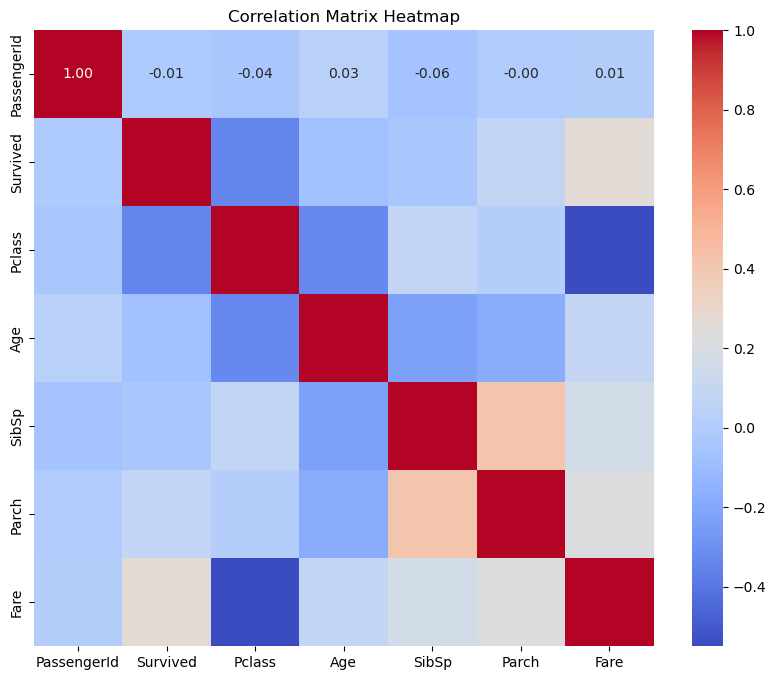

In [8]:

numeric_data = titanic.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()



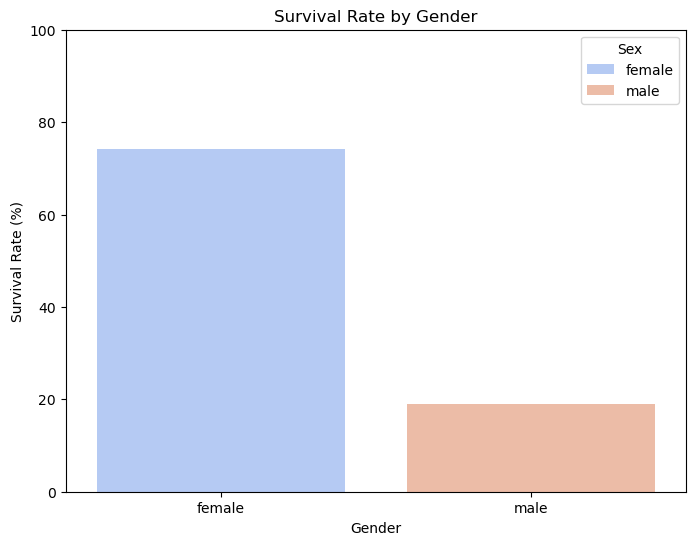

In [9]:
#The following graph shows the survival rate according to the gender
gender_count = titanic['Sex'].value_counts()
survived_gender_count = titanic.groupby('Sex')['Survived'].sum()
survival_rate = (survived_gender_count / gender_count) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate.index, y=survival_rate.values, hue=survival_rate.index, palette='coolwarm', dodge=False)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()


C:\Users\natal\AppData\Local\Temp\ipykernel_2276\1630117244.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(titanic['Age'], bins=20,palette='hsv')
c:\Users\natal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


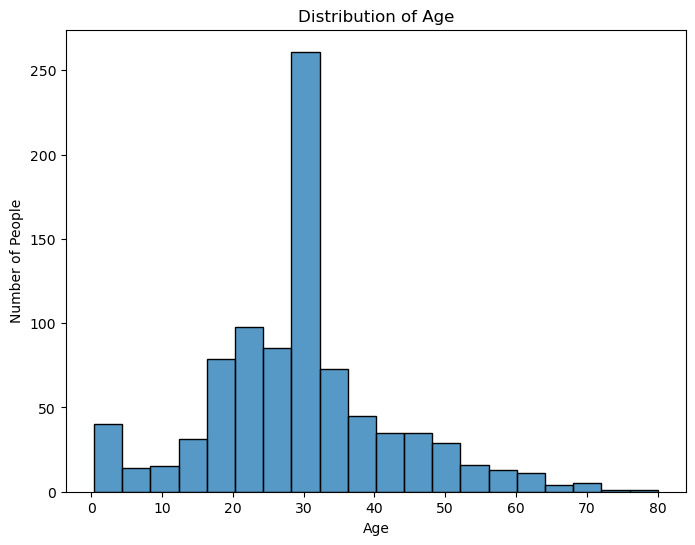

In [10]:
#The graph shows the distribution of age of the people on the Titanic
plt.figure(figsize=(8, 6))
sns.histplot(titanic['Age'], bins=20,palette='hsv')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

c:\Users\natal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


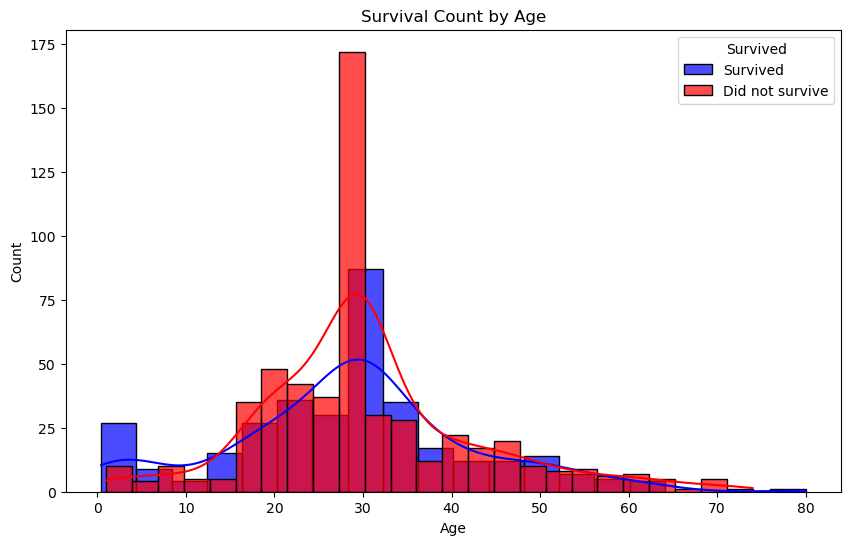

In [11]:
#This graph shows us the relation between Age and Survival
survived = titanic[titanic['Survived'] == 1]
not_survived = titanic[titanic['Survived'] == 0]

plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=survived, kde=True, color='blue', label='Survived', alpha=0.7)
sns.histplot(x='Age', data=not_survived, kde=True, color='red', label='Did not survive', alpha=0.7)
plt.title('Survival Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()


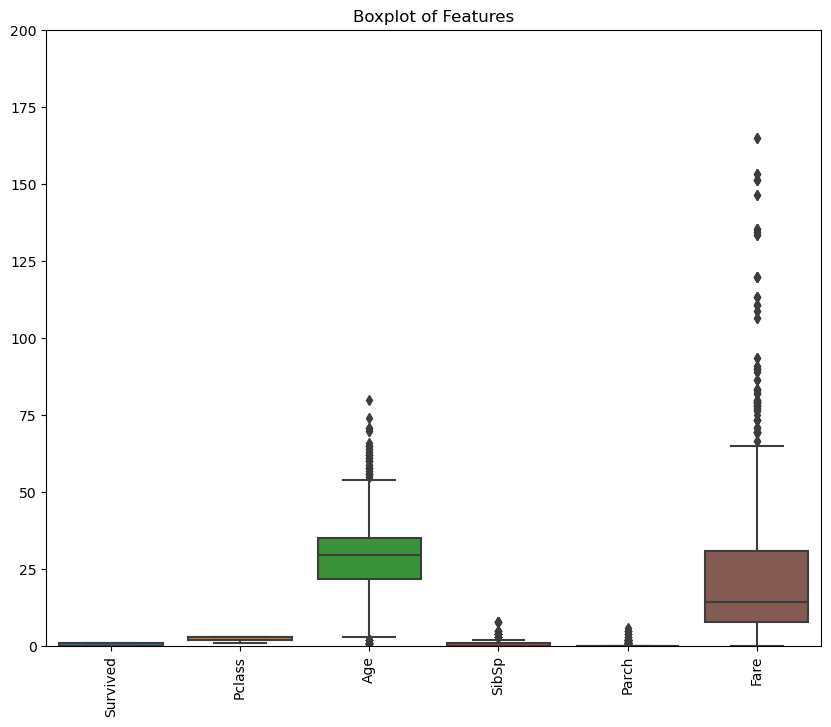

In [12]:
#This boxplot shows us the outliers in each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=titanic.drop(columns=['PassengerId', 'Name', 'Ticket']))
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.ylim(0,200)
plt.show()

c:\Users\natal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

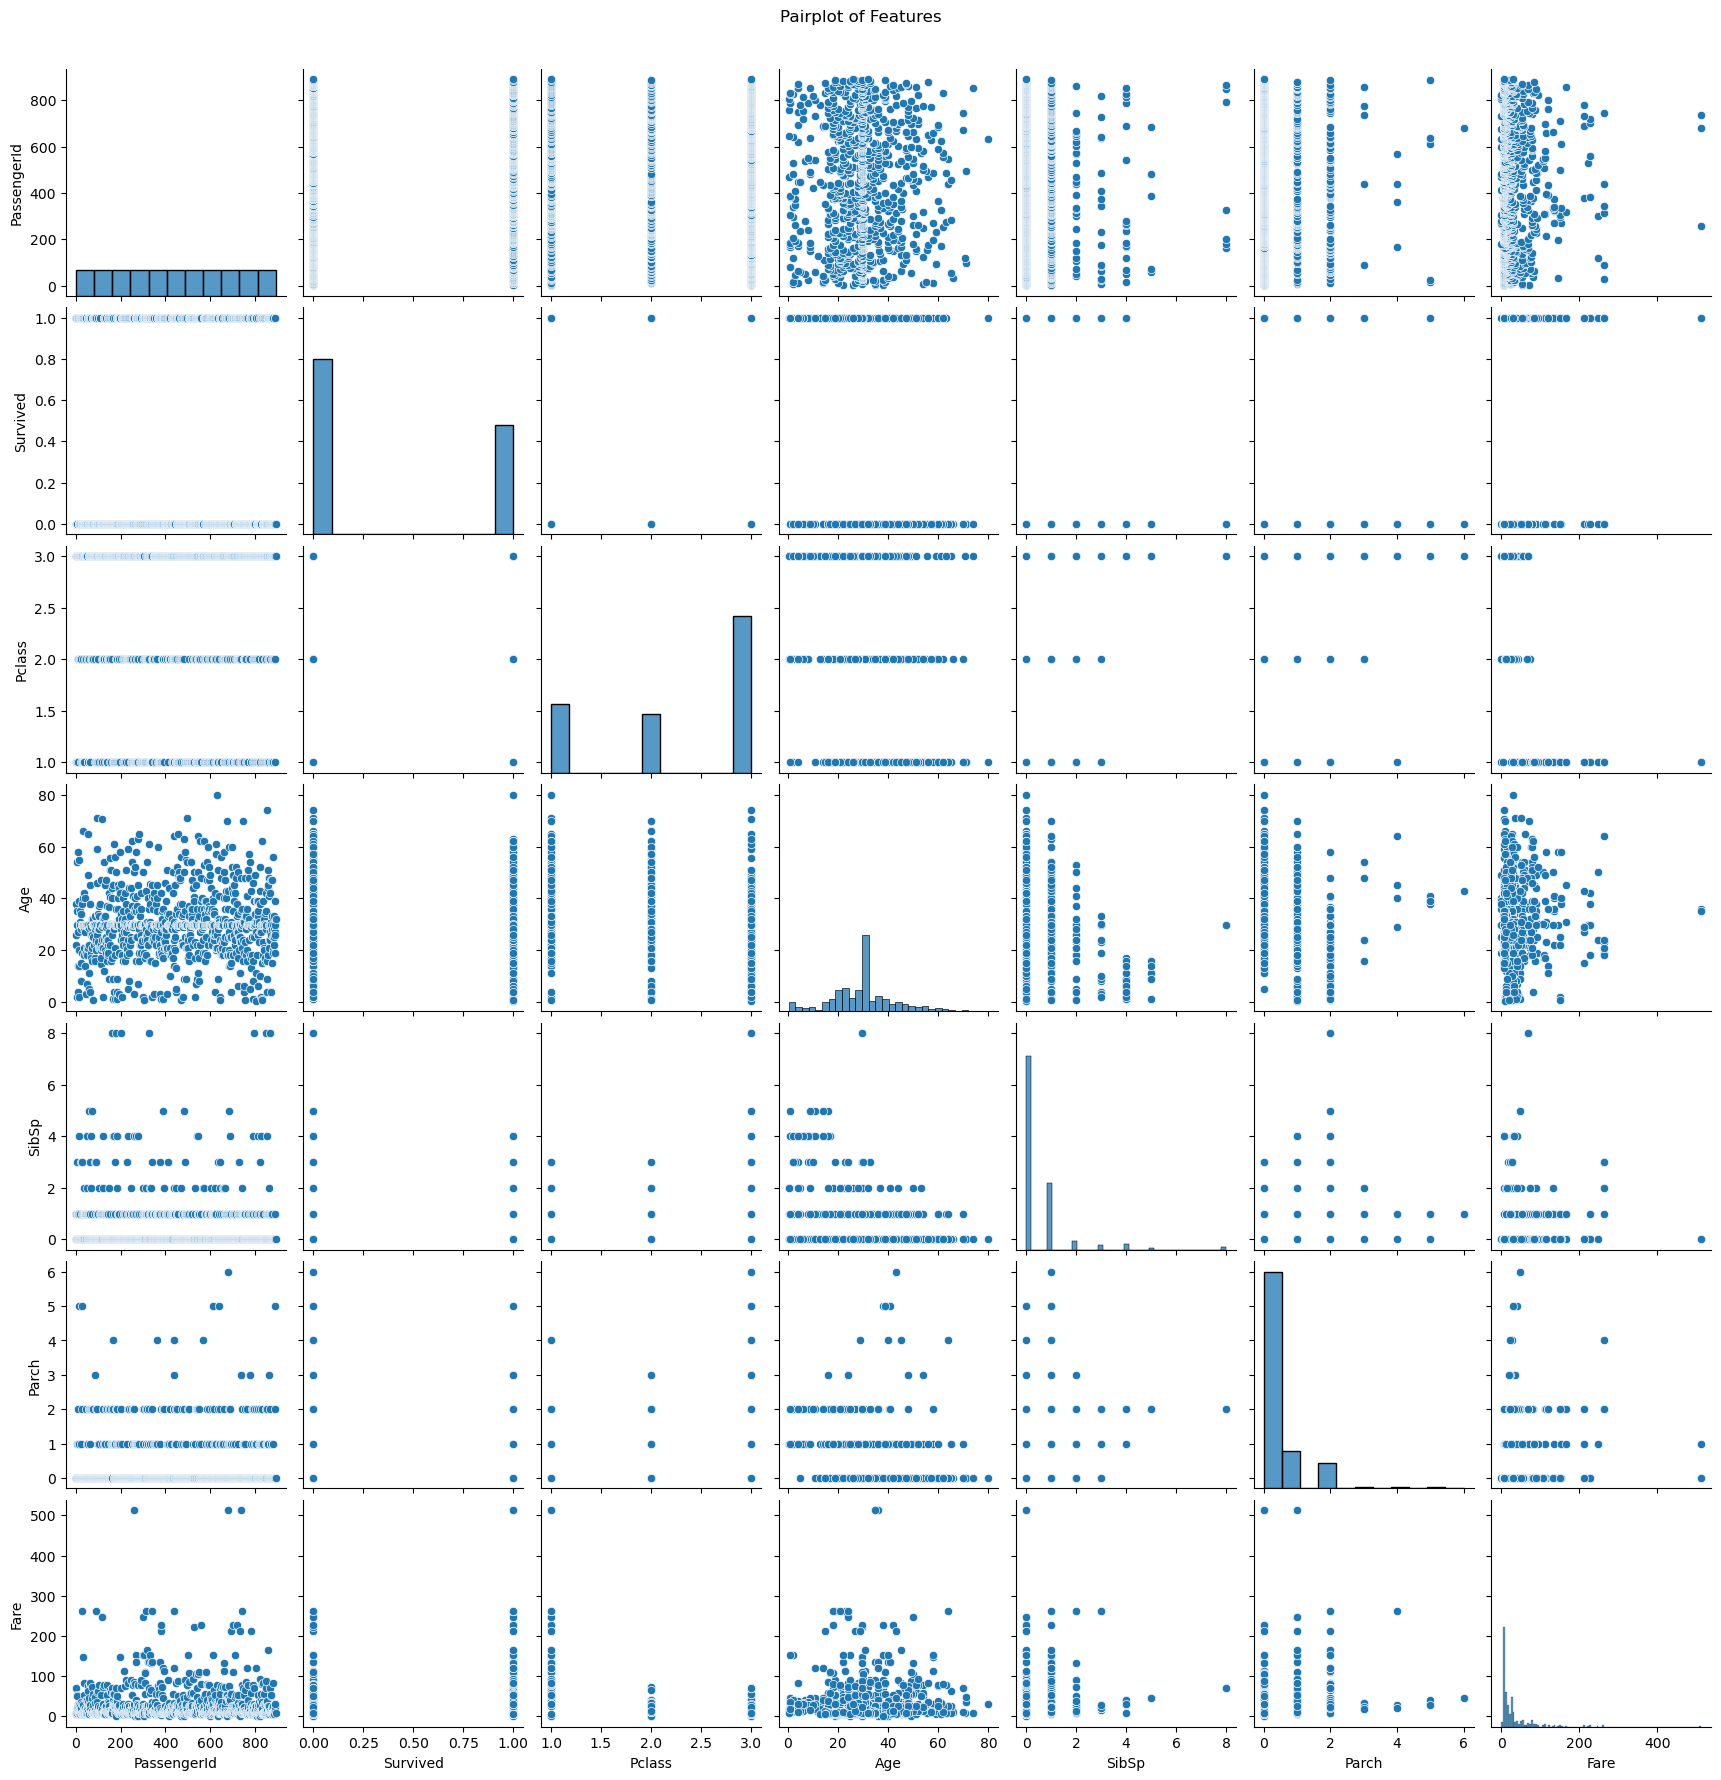

In [13]:
sns.pairplot(titanic)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()